In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# 데이터 시각화를 위한 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  

In [12]:

# 현재 디렉토리의 CSV 파일 로드
df = pd.read_csv('./renttherunway_data.csv')
    
# 기본 정보 출력
print("\n=== 데이터 기본 정보 ===")
print(f"행 수: {df.shape[0]}")
print(f"열 수: {df.shape[1]}")
print("\n=== 결측값 개수 ===")
print(df.isnull().sum())
print("\n=== 데이터 샘플 ===")
print(df.head())



=== 데이터 기본 정보 ===
행 수: 192544
열 수: 15

=== 결측값 개수 ===
fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          68
body type         14637
review_summary      361
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

=== 데이터 샘플 ===
   fit  user_id bust size  item_id  weight  rating     rented for                                        review_text          body type                                     review_summary category height  size    age         review_date
0  fit   420272       34d  2260466  137lbs    10.0       vacation  An adorable romper! Belt and zipper were a lit...          hourglass                               So many compliments!   romper  5' 8"    14   28.0      April 20, 2016
1  fit   273551       34b   153475  132lbs    10.0          other  I rented this dre

c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu 

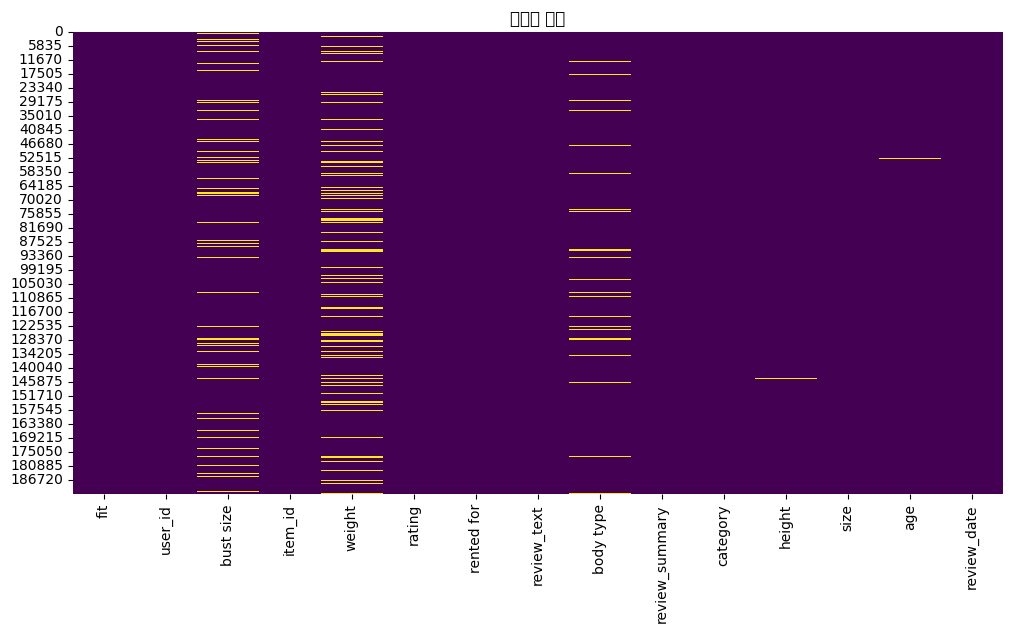


=== 각 열별 결측값 개수 ===
fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          68
body type         14637
review_summary      361
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

=== 각 열별 결측값 비율 ===
fit                0.00
user_id            0.00
bust size          9.56
item_id            0.00
weight            15.57
rating             0.04
rented for         0.01
review_text        0.04
body type          7.60
review_summary     0.19
category           0.00
height             0.35
size               0.00
age                0.50
review_date        0.00
dtype: float64


In [15]:
# 결측값 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('결측값 분포')
plt.show()

#출력시 생략 없애기
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# 각 열별 결측값 개수 출력
print("\n=== 각 열별 결측값 개수 ===")
print(df.isnull().sum())

# 결측값 비율 계산
print("\n=== 각 열별 결측값 비율 ===")
print((df.isnull().sum() / len(df) * 100).round(2))

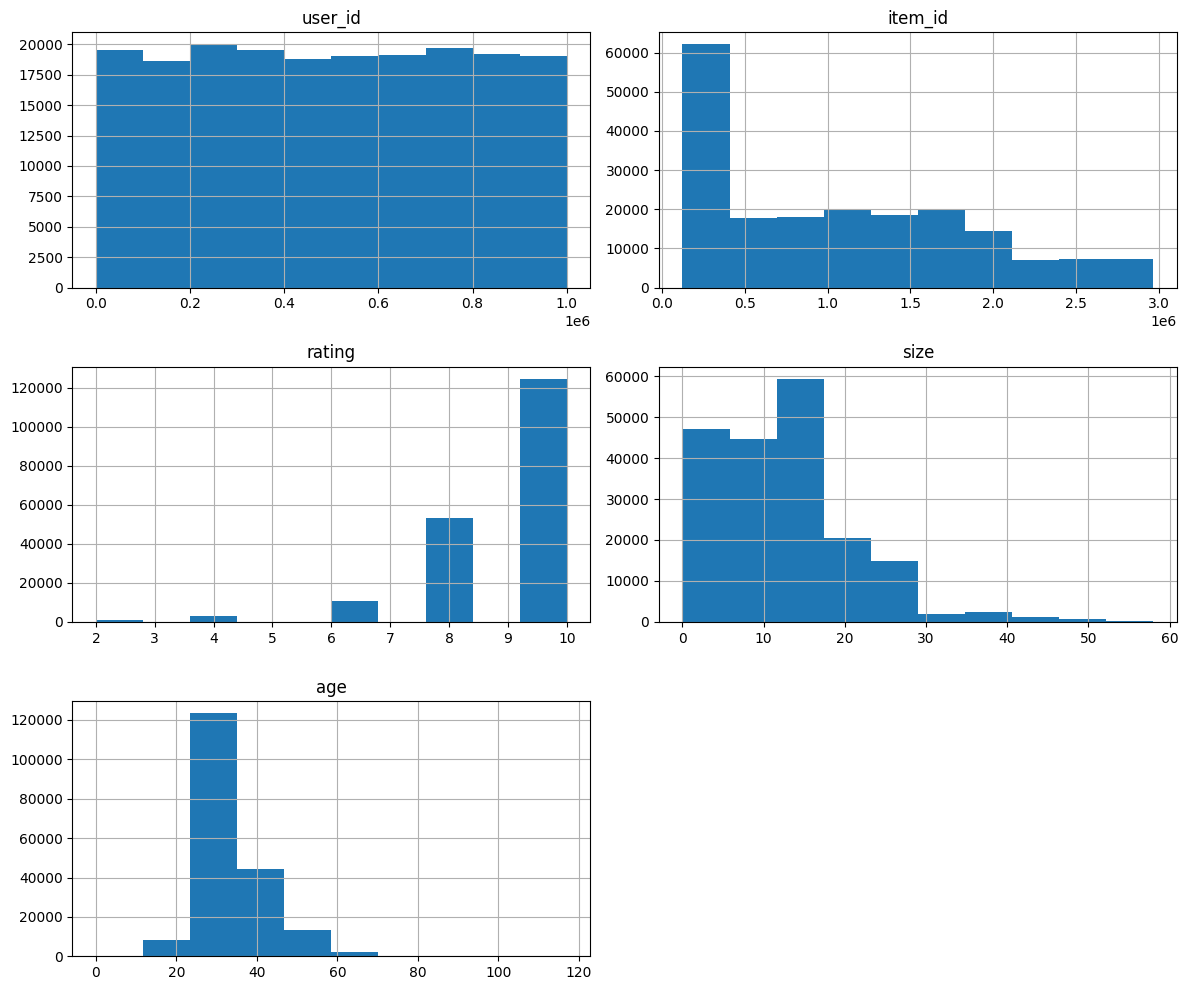

In [16]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


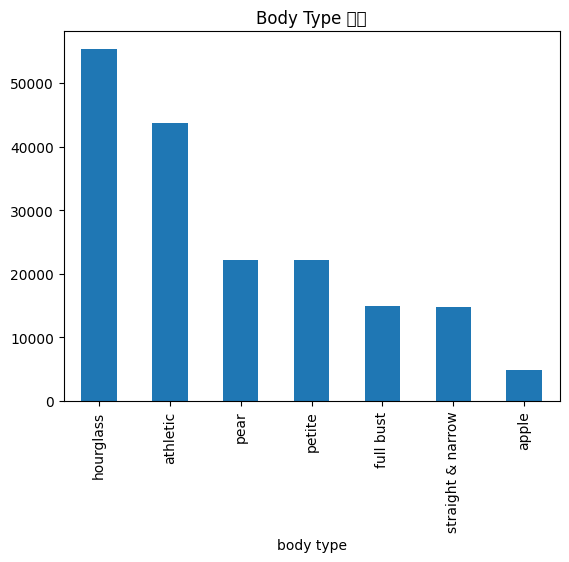

In [19]:
df['body type'].value_counts().plot(kind='bar')
plt.title('Body Type 분포')
plt.show()

c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47926 (\N{HANGUL SYLLABLE MUGG}) missing from font(s) DejaVu Sans.

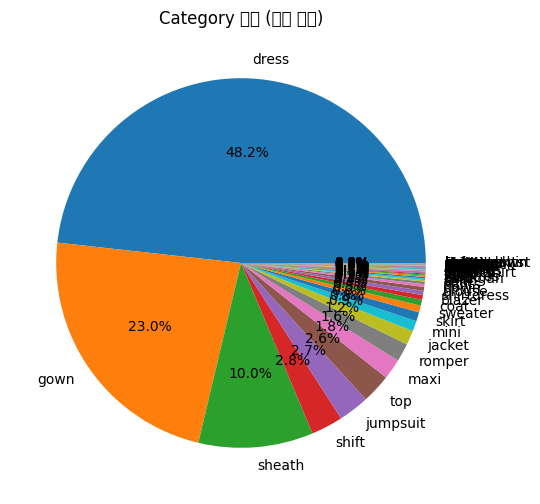

In [27]:
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Category 분포 (기타 묶음)')
plt.ylabel('')
plt.show()

결측값
결측값 비율 낮은 컬럼 (<1%) 
rating (결측: 82, 0.04%): 평균값 대체
height (결측: 677, 0.35%): 평균값 대체
age (결측: 960, 0.50%): 평균값 대체

결측값 비율 있는 컬럼 (7~15%) 
bust size (결측: 18,411, 9.56%): 최빈값 대체
weight (결측: 29,982, 15.57%): 평균값 대체(범주형)
body type (결측: 14,637, 7.60%): 최빈값 대체

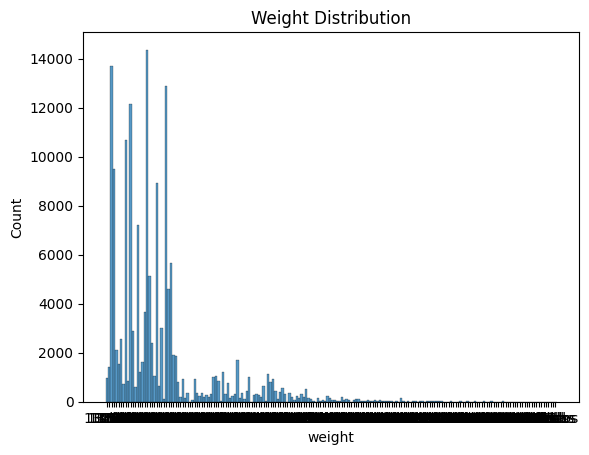

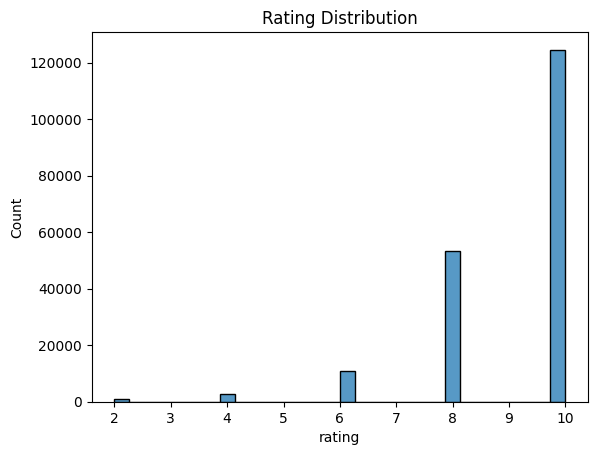

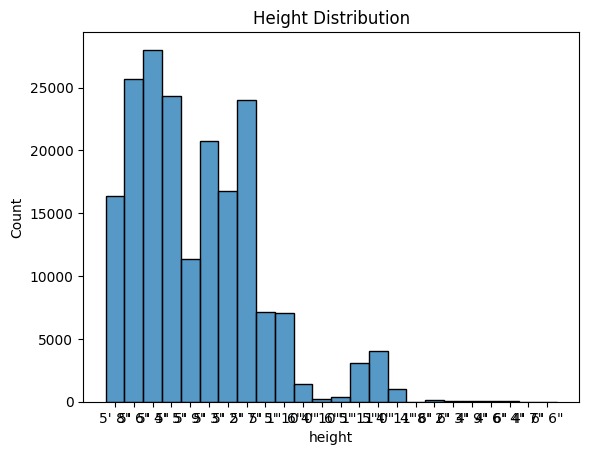

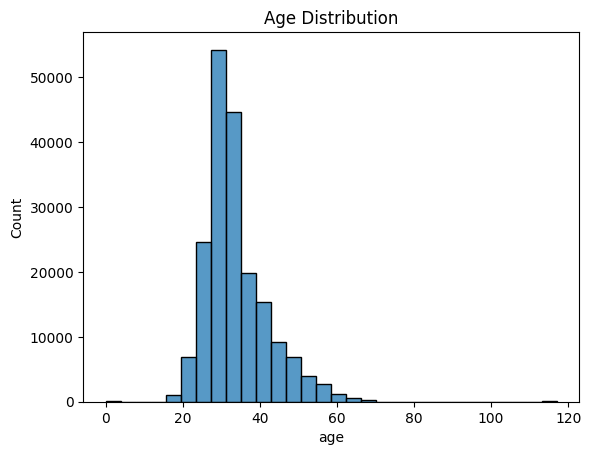

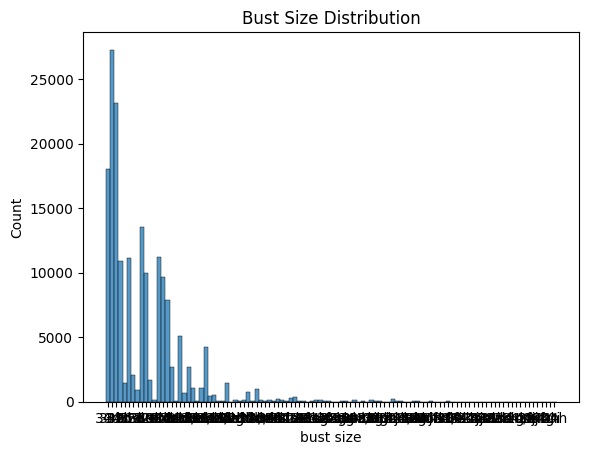

In [28]:
sns.histplot(df['weight'], bins=30)
plt.title('Weight Distribution')
plt.show()

sns.histplot(df['rating'], bins=30)
plt.title('Rating Distribution')
plt.show()

sns.histplot(df['height'], bins=30)
plt.title('Height Distribution')
plt.show()

sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['bust size'], bins=30)
plt.title('Bust Size Distribution')
plt.show()




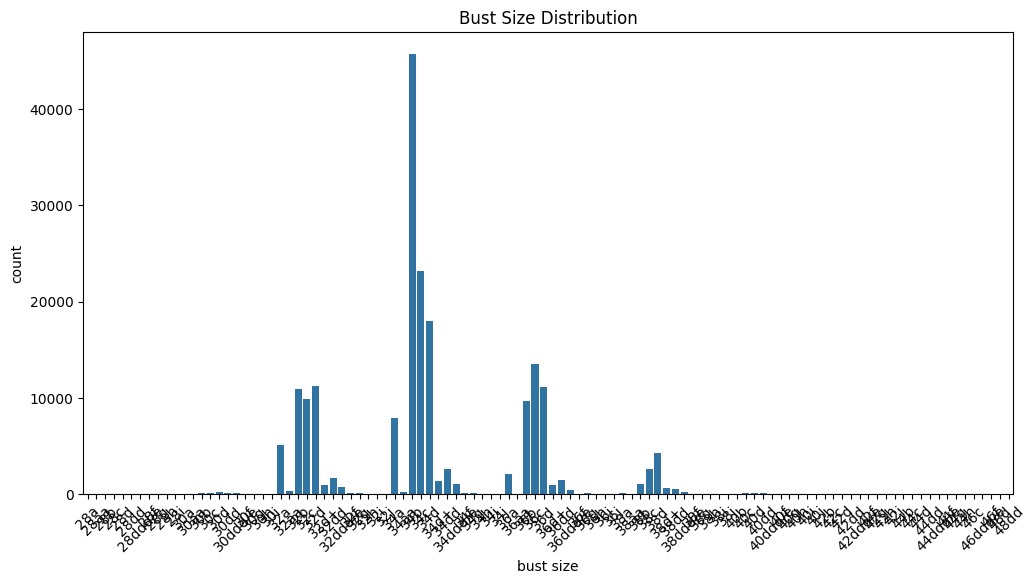

bust size
34b        45696
34c        23139
34d        18029
36c        13516
32d        11196
36d        11122
32b        10911
32c         9943
36b         9676
34a         7891
32a         5094
38d         4259
38c         2669
34dd        2665
36a         2087
32dd        1714
36dd        1468
34d+        1417
38b         1032
34ddd/e     1030
36d+         948
32d+         930
32ddd/e      726
38d+         661
38dd         520
36ddd/e      445
32aa         331
34aa         280
30d          195
38ddd/e      190
30c          163
40d          145
32f          145
32g          128
34f          121
34g          115
40dd         115
30ddd/e      108
30b          103
30dd         102
36g           94
40c           89
38a           82
28b           73
30a           72
36aa          66
36f           66
28a           60
34h           57
28c           56
42dd          49
38f           48
40ddd/e       47
38g           47
42c           46
42d           44
30f           36
44dd          36
28dd

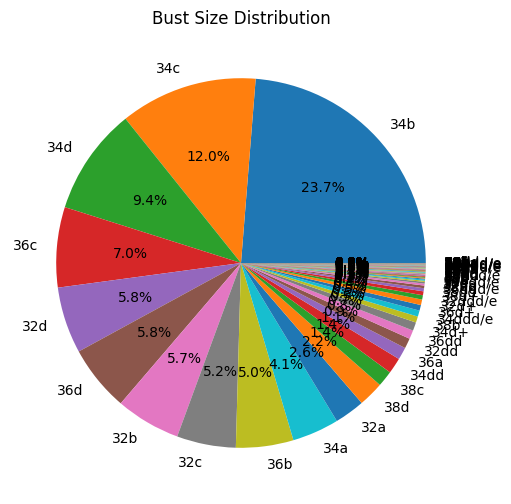

In [34]:
# bust size 빈도 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='bust size', data=df, order=sorted(df['bust size'].dropna().unique()))
plt.title('Bust Size Distribution')
plt.xticks(rotation=45)
plt.show()

# bust size 빈도표
bust_size_counts = df['bust size'].value_counts()
print(bust_size_counts)
print(f"결측값 비율: {df['bust size'].isna().mean():.2%}")

most_common_bust_size = df['bust size'].mode()[0]
print(f"최빈값: {most_common_bust_size}")
df.loc[:, 'bust size'] = df['bust size'].apply(lambda x: x if x in bust_size_counts.index else most_common_bust_size)

df['bust size'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Bust Size Distribution')
plt.ylabel('')
plt.show()

단위 변환, 및 결측치 처리

- fit: 숫자로 바꿈(0은 small, 1은 fit, 2는 large)
- user_id: 학습에 직접 사용하지 않고 인덱스로 활용
- bust size: 원앤핫(상위 15위까지, 나머지 other로 묶음)
- item_id: 학습에 직접 사용하지 않고 인덱스로 활용
- weight: ibs → kg 변경
- rating: 현재 1~10인데 1~5로 변경
- body type: 원앤핫
- category: 원앤핫(상위 10위까지만, 나머지 other로 묶음)
- height: 5' 8” → cm 변경
- size
- age


결측값 비율 낮은 컬럼 (<1%)
- rating (결측: 82, 0.04%): 평균값 대체
- height (결측: 677, 0.35%): 평균값 대체
- age (결측: 960, 0.50%): 평균값 대체

결측값 비율 있는 컬럼 (7~15%)
- bust size (결측: 18,411, 9.56%): 최빈값 대체
- weight (결측: 29,982, 15.57%): 평균값 대체(범주형)
- body type (결측: 14,637, 7.60%): 최빈값 대체

In [37]:
import sklearn
print(sklearn.__version__)

1.6.1


In [38]:
# fit 원앤핫
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
fit_encoded = encoder.fit_transform(df[['fit']])
fit_encoded_df = pd.DataFrame(fit_encoded, columns=encoder.get_feature_names_out(['fit']))


In [40]:
# bust size
# bust size: 상위 15개 + 'other'
top_15_bust = df['bust size'].value_counts().head(15).index
df['bust size_grouped'] = df['bust size'].apply(lambda x: x if x in top_15_bust else 'other')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
bust_encoded = encoder.fit_transform(df[['bust size_grouped']])
bust_encoded_df = pd.DataFrame(bust_encoded, columns=encoder.get_feature_names_out(['bust size_grouped']))
df = pd.concat([df, bust_encoded_df], axis=1)

In [42]:
# weight: lbs → kg, 스케일링
# 1. 문자열에서 숫자만 추출
df['weight_cleaned'] = df['weight'].str.extract('(\d+\.?\d*)')  # 숫자만 추출 (정규식)

# 2. float 타입으로 변환
df['weight_cleaned'] = df['weight_cleaned'].astype(float)

# 3. lbs → kg 변환
df['weight_kg'] = df['weight_cleaned'] * 0.453592
scaler = MinMaxScaler()
df['weight_kg_scaled'] = scaler.fit_transform(df[['weight_kg']])

In [43]:
# rating: 1~10 → 1~5, 스케일링
df['rating_scaled'] = (df['rating'] - 1) / 2  # 선형 변환
df['rating_scaled'] = scaler.fit_transform(df[['rating_scaled']])

In [44]:
# body type: 원-핫 인코딩
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
body_encoded = encoder.fit_transform(df[['body type']])
body_encoded_df = pd.DataFrame(body_encoded, columns=encoder.get_feature_names_out(['body type']))
df = pd.concat([df, body_encoded_df], axis=1)

In [45]:
# category: 상위 10개 + 'other'
top_10_categories = df['category'].value_counts().head(10).index
df['category_grouped'] = df['category'].apply(lambda x: x if x in top_10_categories else 'other')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_encoded = encoder.fit_transform(df[['category_grouped']])
category_encoded_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['category_grouped']))
df = pd.concat([df, category_encoded_df], axis=1)

In [51]:
# height: feet/inch → cm, 스케일링
def height_to_cm(height):
    if pd.isna(height):
        return np.nan
    try:
        feet, inches = height.split("'")
        inches = inches.replace('"', '').strip()
        return int(feet) * 30.48 + int(inches) * 2.54
    except:
        return np.nan
df['height_cm'] = df['height'].apply(height_to_cm)
df['height_cm'] = df['height_cm'].fillna(df['height_cm'].mean())  # 재확인
df['height_cm_scaled'] = scaler.fit_transform(df[['height_cm']])

In [47]:
# size: 수치형, 스케일링
df['size_scaled'] = scaler.fit_transform(df[['size']])

# age: 수치형, 스케일링
df['age_scaled'] = scaler.fit_transform(df[['age']])

In [54]:
df['rating'] = df['rating'].fillna(df['rating'].mean())  # 평균값 (0.04%)
df['height_cm'] = df['height_cm'].fillna(df['height_cm'].mean()) # 평균값 (0.35%)
df['age'] = df['age'].fillna(df['age'].mean())          # 평균값 (0.50%)
df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].mean())  # 평균값 (15.57%)
df['size'] = df['size'].fillna(df['size'].mean())       # 평균값 (수치형)
df['bust size'] = df['bust size'].fillna(df['bust size'].mode()[0])  # 최빈값 (9.56%)
df['body type'] = df['body type'].fillna(df['body type'].mode()[0])   # 최빈값 (7.60%)

c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\toy3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


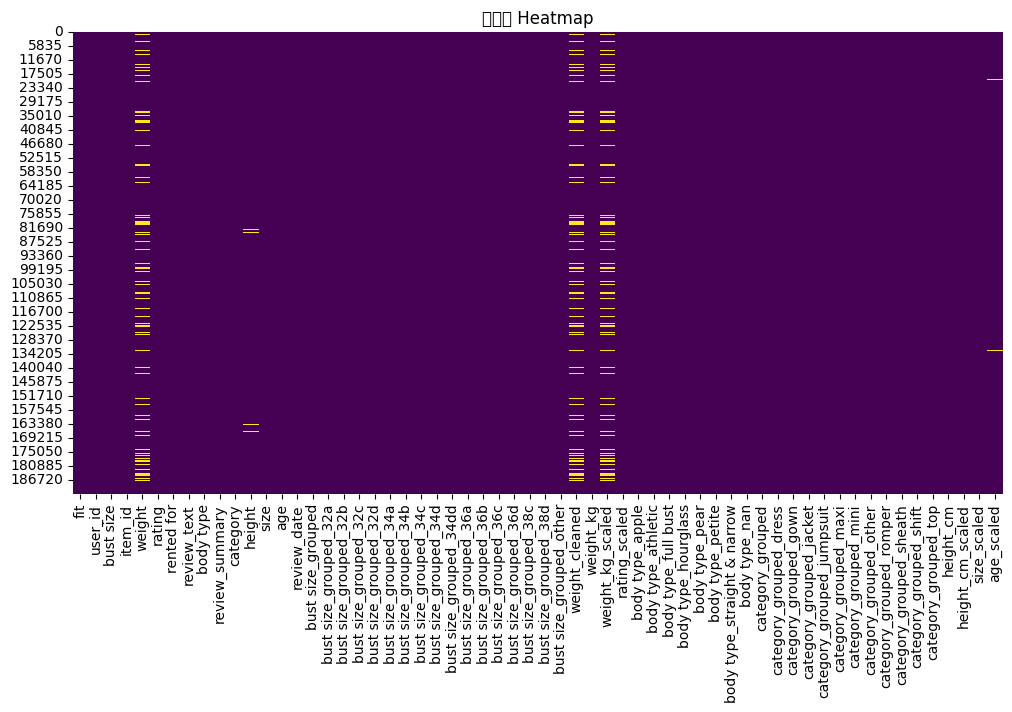

In [55]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('결측값 Heatmap')
plt.show()

In [56]:
print("\n=== 각 열별 결측값 개수 ===")
print(df.isnull().sum())

# 결측값 비율 계산
print("\n=== 각 열별 결측값 비율 ===")
print((df.isnull().sum() / len(df) * 100).round(2))


=== 각 열별 결측값 개수 ===
fit                                0
user_id                            0
bust size                          0
item_id                            0
weight                         29982
rating                             0
rented for                        10
review_text                       68
body type                          0
review_summary                   361
category                           0
height                           677
size                               0
age                                0
review_date                        0
bust size_grouped                  0
bust size_grouped_32a              0
bust size_grouped_32b              0
bust size_grouped_32c              0
bust size_grouped_32d              0
bust size_grouped_34a              0
bust size_grouped_34b              0
bust size_grouped_34c              0
bust size_grouped_34d              0
bust size_grouped_34dd             0
bust size_grouped_36a              0
bust size_grouped

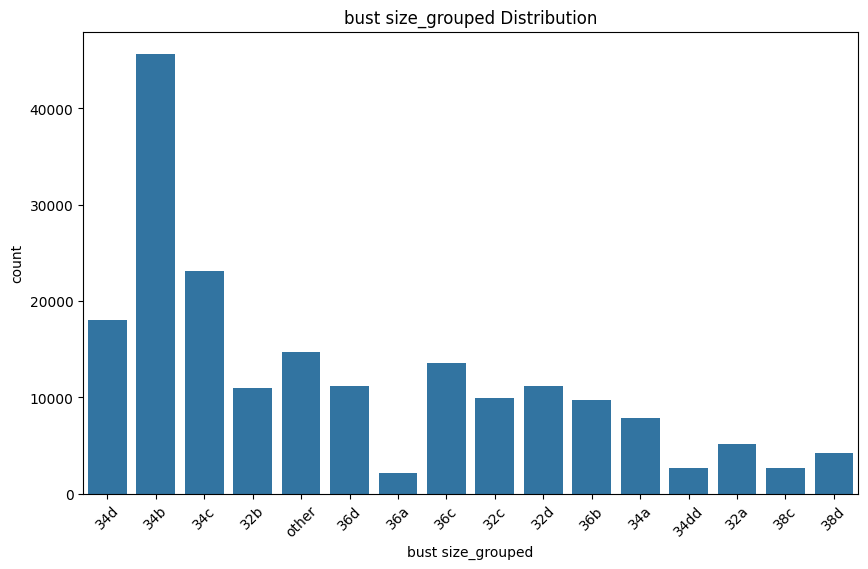

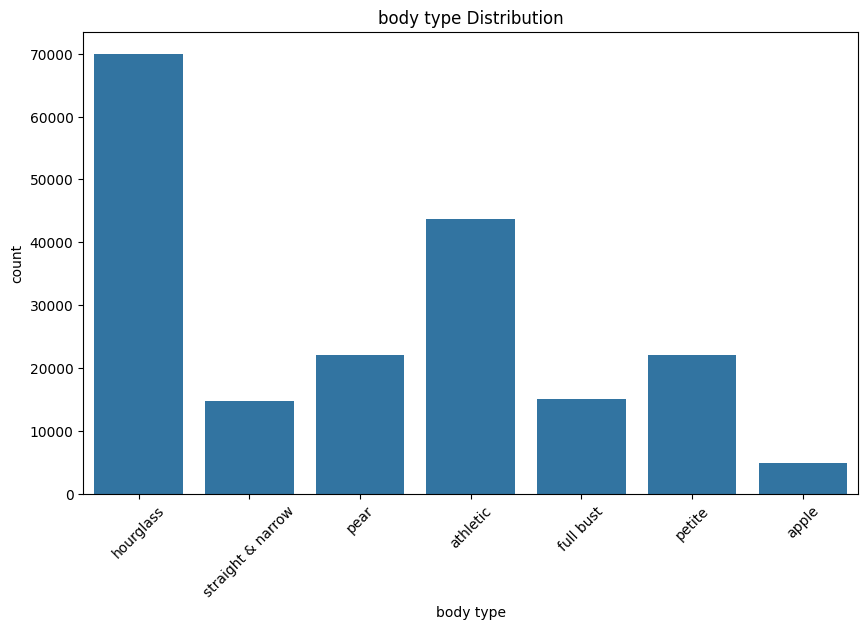

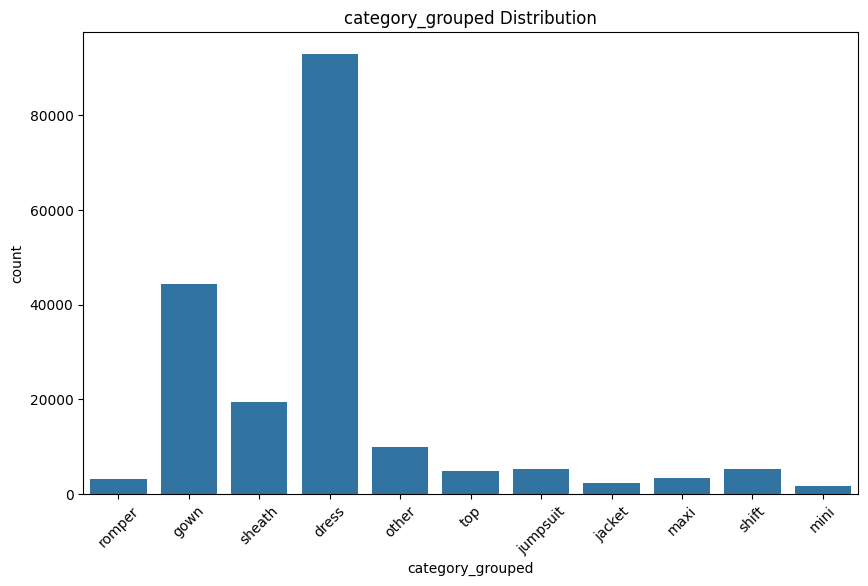

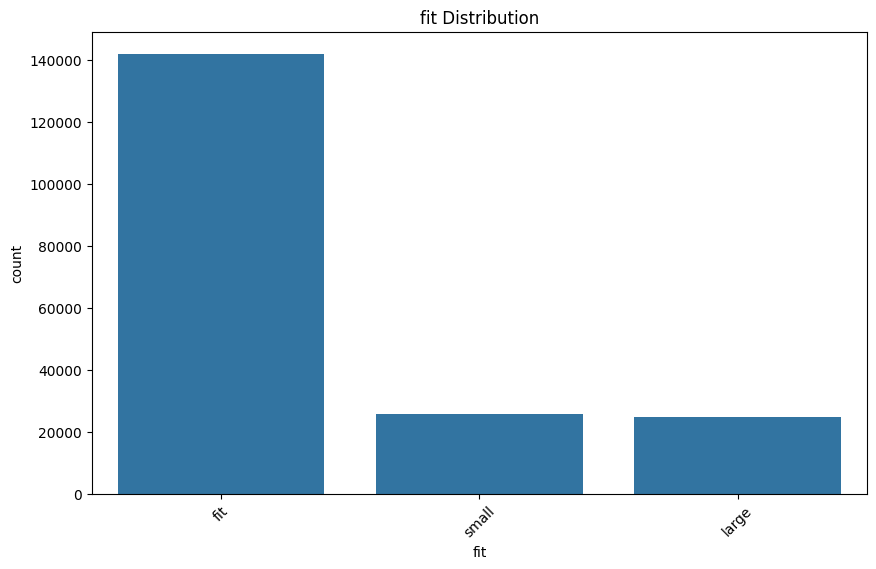

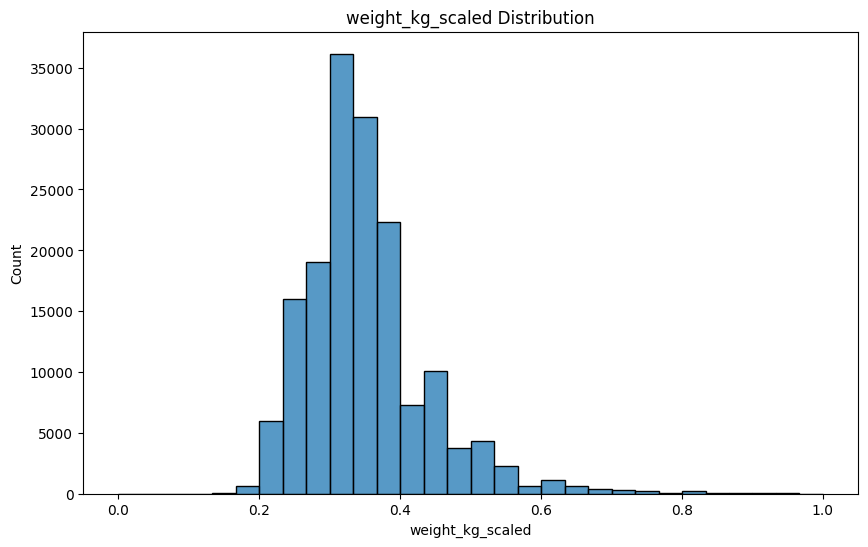

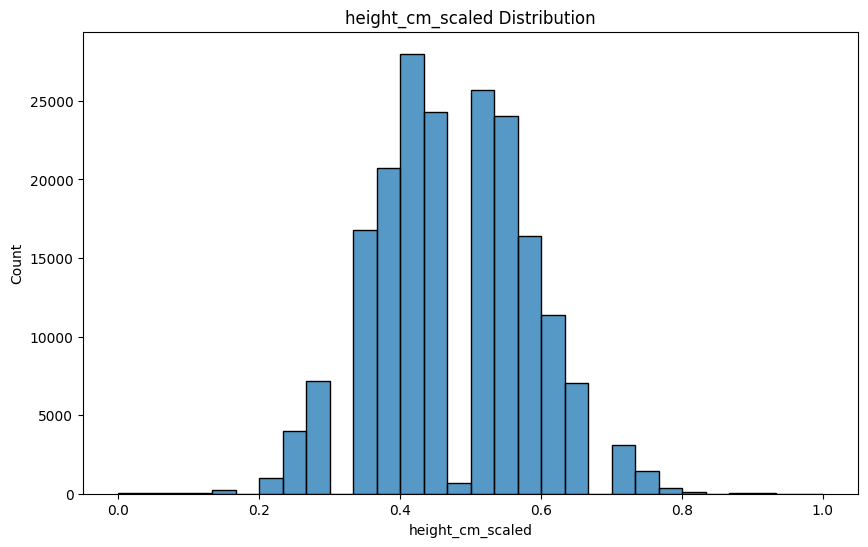

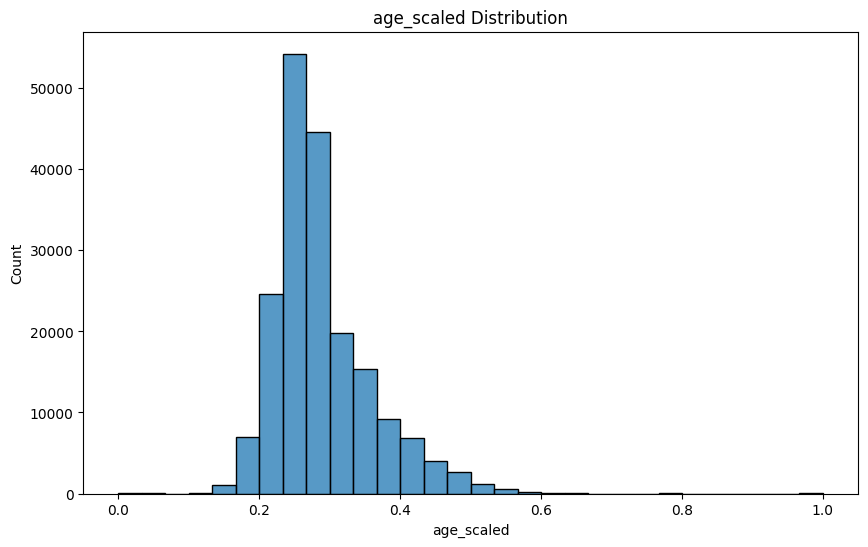

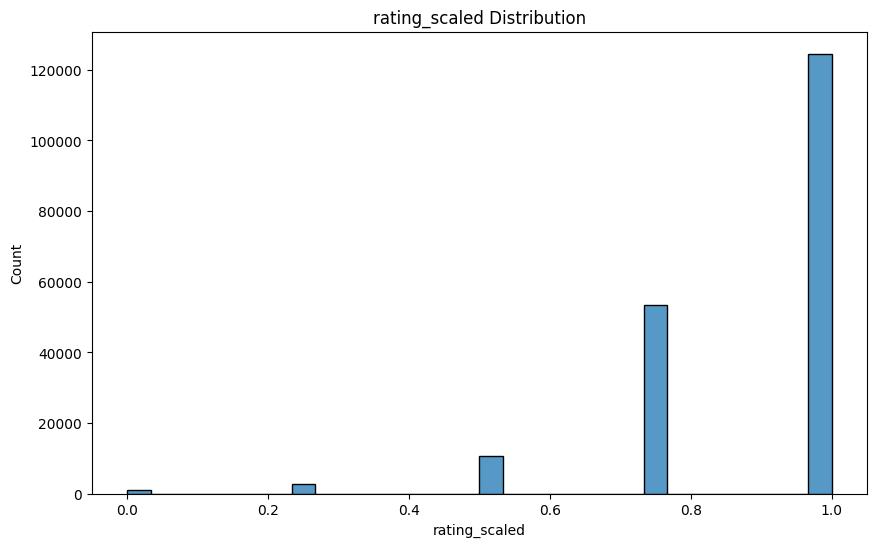

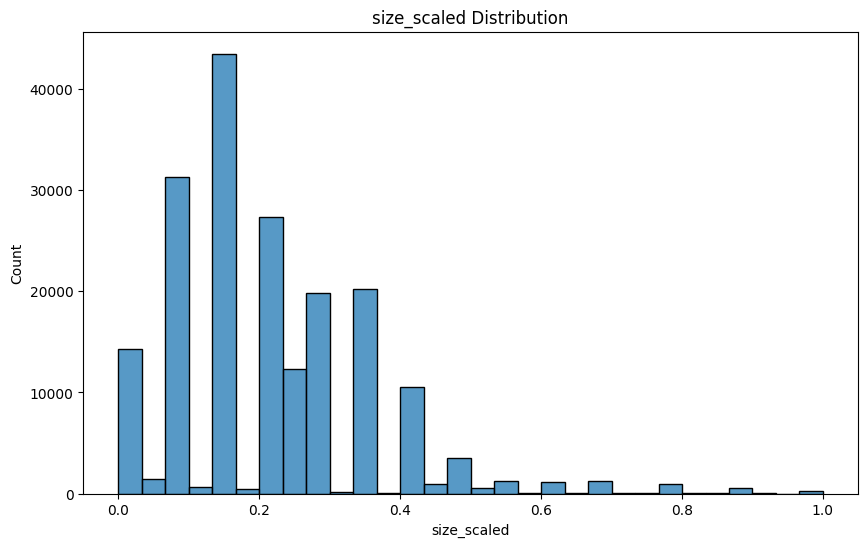

In [57]:
for col in ['bust size_grouped', 'body type', 'category_grouped', 'fit']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

# 수치형 분포
for col in ['weight_kg_scaled', 'height_cm_scaled', 'age_scaled', 'rating_scaled', 'size_scaled']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30)
    plt.title(f'{col} Distribution')
    plt.show()